# Objectives
- Understanding users - *Key Performance Indicators*
- Identifying trends - *Exploratory data analysis*
- Optimizing performance - *Design of A/B Tests*
- Data driven decision - *Analyizing A/B test results*
> 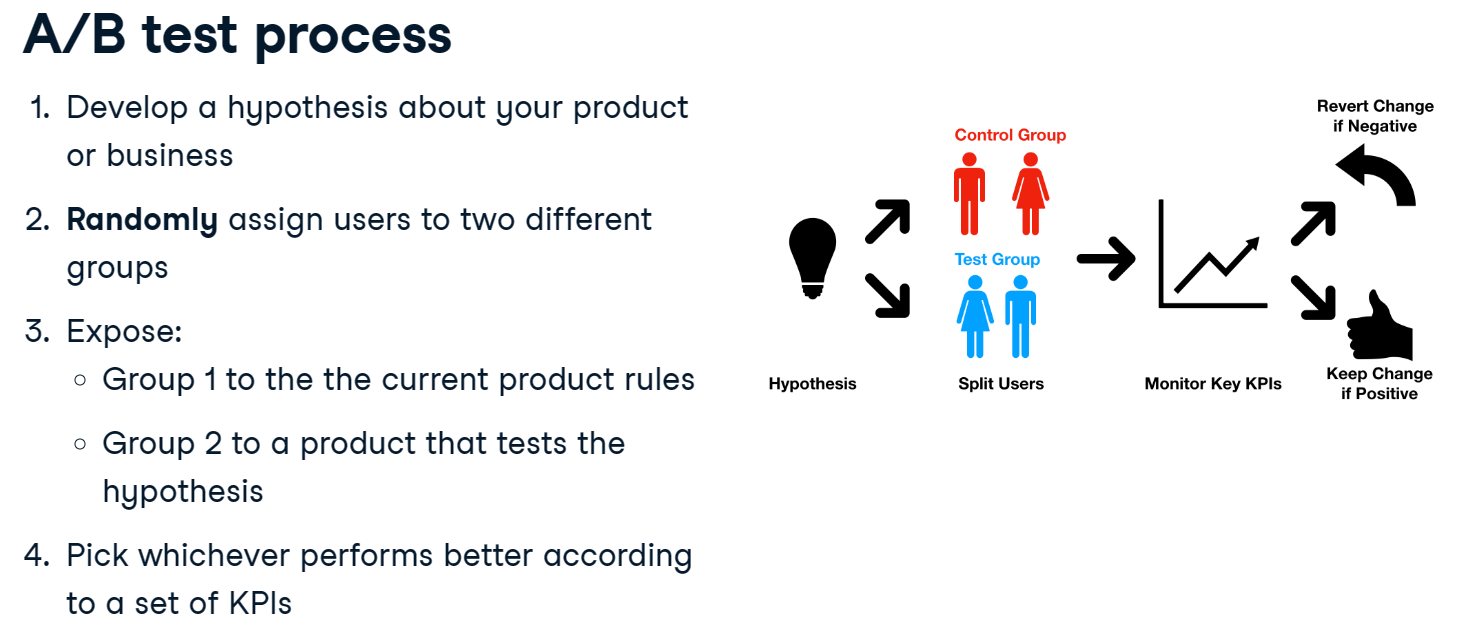
**To measure impact of changes on KPIs**: experience + domain knowledge + exploratory data analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
url = 'https://assets.datacamp.com/production/repositories/1646/datasets/c3a701a4729471ae0b92d8c300b470fd2ec0a73a/user_demographics_v1.csv'
cust = pd.read_csv(url, parse_dates = ['reg_date'])
cust.to_csv('/QXJ/Python/Datacamp/Marketing/AB/cust.csv')
cust.head()

,uid,reg_date,device,gender,country,age
0,54030035.0,2017-06-29 00:00:00+00:00,and,M,USA,19
1,72574201.0,2018-03-05 00:00:00+00:00,iOS,F,TUR,22
2,64187558.0,2016-02-07 00:00:00+00:00,iOS,M,USA,16
3,92513925.0,2017-05-25 00:00:00+00:00,and,M,BRA,41
4,99231338.0,2017-03-26 00:00:00+00:00,iOS,M,FRA,59


In [51]:
import datetime
cust['date'] = cust['reg_date'].dt.date
cust.head(2)

,uid,reg_date,device,gender,country,age,date
0,54030035.0,2017-06-29 00:00:00+00:00,and,M,USA,19,2017-06-29
1,72574201.0,2018-03-05 00:00:00+00:00,iOS,F,TUR,22,2018-03-05


In [52]:
cust = cust.drop('reg_date', axis = 1)
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   uid      10000 non-null  float64
 1   device   10000 non-null  object 
 2   gender   10000 non-null  object 
 3   country  10000 non-null  object 
 4   age      10000 non-null  int64  
 5   date     10000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [54]:
cust['date'] = pd.to_datetime(cust['date'])
cust['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: date
Non-Null Count  Dtype         
--------------  -----         
10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


In [55]:
cust['date'].head(2)

0   2017-06-29
1   2018-03-05
Name: date, dtype: datetime64[ns]

In [39]:
url = 'https://assets.datacamp.com/production/repositories/1646/datasets/5decd183ef3710475958bbc903160fd6354379d5/purchase_data_v1.csv'
app = pd.read_csv(url, parse_dates = ['date'])
app.to_csv('/QXJ/Python/Datacamp/Marketing/AB/app.csv')
app.head()

,date,uid,sku,price
0,2017-07-10,41195147,sku_three_499,499
1,2017-07-15,41195147,sku_three_499,499
2,2017-11-12,41195147,sku_four_599,599
3,2017-09-26,91591874,sku_two_299,299
4,2017-12-01,91591874,sku_four_599,599


In [48]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9006 entries, 0 to 9005
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    9006 non-null   datetime64[ns]
 1   uid     9006 non-null   int64         
 2   sku     9006 non-null   object        
 3   price   9006 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 281.6+ KB


In [74]:
url = 'https://assets.datacamp.com/production/repositories/1646/datasets/3afb49cad9fb91c02b71b52a2ddc0071ea13764c/daily_revenue.csv'
revenue = pd.read_csv(url, parse_dates = ['date'])
revenue.to_csv('/QXJ/Python/Datacamp/Marketing/AB/revenue.csv')
revenue.head()

,index,gender,device,revenue,date,country
0,1,male,ios,186557.0,2013-09-20 00:00:00+00:00,USA
1,2,male,ios,177217.0,2013-09-21 00:00:00+00:00,USA
2,3,male,ios,177197.0,2013-09-22 00:00:00+00:00,USA
3,4,male,ios,157193.0,2013-09-23 00:00:00+00:00,USA
4,5,male,ios,165592.0,2013-09-24 00:00:00+00:00,USA


In [7]:
url = 'https://assets.datacamp.com/production/repositories/1646/datasets/01054025eb094ac1086edf8d206b313b84d911c5/user_demographics_paywall.csv'
demo = pd.read_csv(url)
demo.to_csv('/QXJ/Python/Datacamp/Marketing/AB/demo.csv')
demo.head()

,uid,reg_date,device,gender,country,age
0,52774929,2018-03-07T00:00:00Z,and,F,FRA,27
1,40143397,2016-07-02T00:00:00Z,and,F,DEU,56
2,89856430,2017-06-05T00:00:00Z,and,M,TUR,31
3,76188504,2016-09-24T00:00:00Z,iOS,M,BRA,54
4,76493748,2017-06-07T00:00:00Z,iOS,M,BRA,24


In [11]:
url = 'https://assets.datacamp.com/production/repositories/1646/datasets/01054025eb094ac1086edf8d206b313b84d911c5/user_demographics_paywall.csv'
cust_demo = pd.read_csv(url)
cust_demo.head()

,uid,reg_date,device,gender,country,age
0,52774929,2018-03-07T00:00:00Z,and,F,FRA,27
1,40143397,2016-07-02T00:00:00Z,and,F,DEU,56
2,89856430,2017-06-05T00:00:00Z,and,M,TUR,31
3,76188504,2016-09-24T00:00:00Z,iOS,M,BRA,54
4,76493748,2017-06-07T00:00:00Z,iOS,M,BRA,24


In [18]:
cust_demo = cust_demo.rename(columns = {'reg_date':'date'})
cust_demo.head()

,uid,date,device,gender,country,age
0,52774929,2018-03-07T00:00:00Z,and,F,FRA,27
1,40143397,2016-07-02T00:00:00Z,and,F,DEU,56
2,89856430,2017-06-05T00:00:00Z,and,M,TUR,31
3,76188504,2016-09-24T00:00:00Z,iOS,M,BRA,54
4,76493748,2017-06-07T00:00:00Z,iOS,M,BRA,24


In [19]:
cust_demo.to_csv('/QXJ/Python/Datacamp/Marketing/AB/cust_demo.csv')

## 1. KPI
- **Maintain high fee -> paid conversion rate**
  - Stability over time
  - Importance across different user groups
  - Correlation with other business factors, such as retention or spending than others
- **Conservtion rate**: percentage of users who subscribe after the free trail 
  - Interval
    - of users who convert within one week or one month?
    - across all users or just a subset? 
> 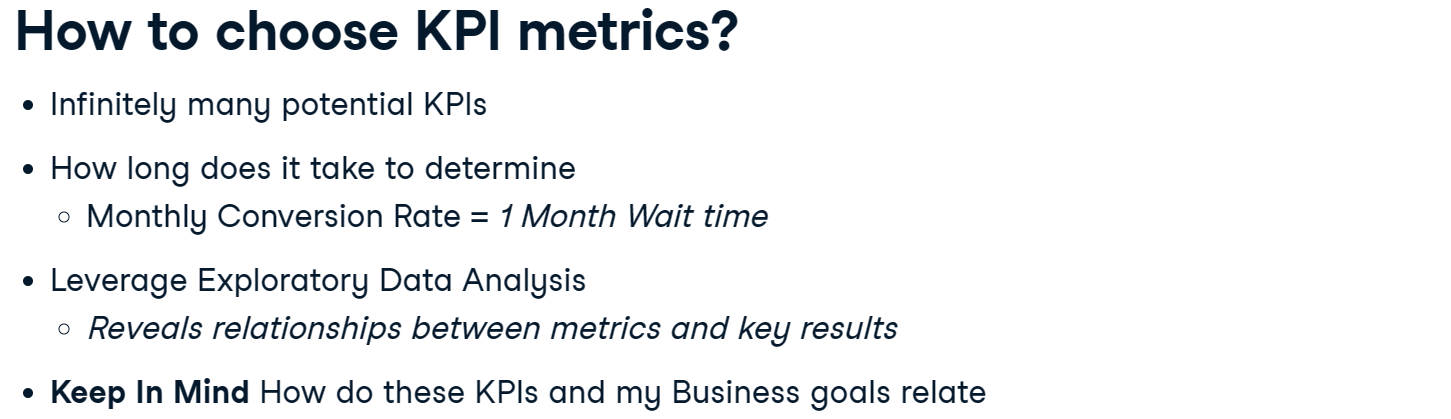

In [79]:
df_merged = cust.merge(app, how = 'inner',
          on = ['uid'], suffixes = ['_reg', '_purchase'])
df_merged.head()

,uid,device,gender,country,age,date_reg,date_purchase,sku,price
0,92513925.0,and,M,BRA,41,2017-05-25,2017-10-20,sku_three_499,499
1,92513925.0,and,M,BRA,41,2017-05-25,2017-05-29,sku_two_299,299
2,92513925.0,and,M,BRA,41,2017-05-25,2017-08-23,sku_four_599,599
3,92513925.0,and,M,BRA,41,2017-05-25,2018-03-26,sku_six_1299,299
4,16377492.0,and,M,BRA,20,2016-10-16,2018-03-17,sku_one_199,199


In [86]:
df_merged.to_csv('/QXJ/Python/Datacamp/Marketing/AB/df_merged.csv')

In [60]:
df_merged.shape

(9006, 9)

In [61]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9006 entries, 0 to 9005
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   uid      9006 non-null   float64       
 1   device   9006 non-null   object        
 2   gender   9006 non-null   object        
 3   country  9006 non-null   object        
 4   age      9006 non-null   int64         
 5   date_x   9006 non-null   datetime64[ns]
 6   date_y   9006 non-null   datetime64[ns]
 7   sku      9006 non-null   object        
 8   price    9006 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 703.6+ KB


**EDA**

In [68]:
# group by columns is default = 0
df_merged_grp = df_merged.groupby(by = ['country','device'],
                                 axis = 0,
                                 as_index = False).agg({
'price': ['mean', 'median' ,'min', 'max'],
'age': ['mean', 'median' ,'min', 'max']   
})

df_merged_grp.head()

country device       price                        age               
                        mean median min  max       mean median min max
0     BRA    and  412.985594  499.0  99  899  23.913565   21.0  15  62
1     BRA    iOS  404.739300  299.0  99  899  23.975681   22.0  15  66
2     CAN    and  406.826087  499.0  99  899  23.282609   20.0  15  49
3     CAN    iOS  386.573964  299.0  99  899  25.023669   19.0  15  57
4     DEU    and  402.474903  299.0  99  899  23.814672   21.0  15  66

In [67]:
def truncated_mean(data):
    """Compute the mean excluding outliers"""
    top_val = data.quantile(0.9)
    bot_val = data.quantile(0.1)
    trunc_data = data[(data <= top_val) & (data >= bot_val)]
    mean = trunc_data.mean()
    return(mean)

truncated_mean(df_merged['age'])

21.671544515494343

In [69]:
df_merged.groupby(['country','device']).agg({
    'age': [truncated_mean]
})

age
               truncated_mean
country device               
BRA     and         22.798977
        iOS         22.784946
CAN     and         23.335000
        iOS         24.048780
DEU     and         21.640257
        iOS         19.611413
FRA     and         21.786885
        iOS         23.123457
TUR     and         22.422572
        iOS         20.488599
USA     and         22.241203
        iOS         21.573672

*.**Goal**: examine the KPI "user conversion rate" after the free trail = total subscribers / potential subscribers*
<br>
*.**Week one conversion rate**: Limit to users who convert in their first week after the trail ends*

In [116]:
from datetime import datetime, timedelta
current_date = pd.to_datetime('2018-03-17')

# calculate the lapse date
print(conv_sub.reg_date.max())

2018-03-17 00:00:00


In [119]:
# latest lapse date: a week before today
max_lapse_date = current_date - timedelta(7)

# restrict to users lapsed before max_lapse date
conv_sub = conv_sub[(conv_sub.lapse_date < max_lapse_date)]

# count the users remaining in our data
total_users_count = conv_sub.price.count()

In [113]:
# latest subscription date: within 7 days of lapsing
max_sub_date = conv_sub.reg_date + timedelta(days = 7)

# filter the users with non-zero subscription price
# who subscribed before max_sub_date
total_subs = conv_sub[
    (conv_sub.price > 0) &
    (conv_sub.subscription_date <= max_sub_date)
]

# count the users remaining in our data
total_subs_count = total_subs.price.count()
print(total_subs_count)

218


In [121]:
# calculate the conversion rate with our previous values
conv_rate = total_subs_count / total_users_count
conv_rate

0.024387515382033785

**Cohort conversion rate**

In [123]:
# create a copy of the dataframe
conv_sub = conv_sub.copy()

# keep users who lapsed prior to the last 14 days (2 weeks)
max_lapse_date = current_date - timedelta(days=14)
conv_sub = conv_sub[
    (conv_sub.lapse_date <= max_lapse_date)
]

In [125]:
# find the days between lapse and subscription if they
# subscribed --- and pd.NaT otherwise
sub_time = np.where(
# if: a subscription date exists
conv_sub.subscription_date.notnull(),
# then: find how many days since their lapse
(conv_sub.subscription_date - conv_sub.lapse_date).dt.days,
# else: set the value to pd.NaT
    pd.NaT)

# create a new column'sub_time'
conv_sub['sub_time'] = sub_time

In [127]:
conv_sub.head()

,uid,device,gender,country,age,reg_date,subscription_date,sku,price,month1,lapse_date,sub_time
0,92513925.0,and,M,BRA,41,2017-05-25,2017-10-20,sku_three_499,499,NaN,2017-06-22,120
1,92513925.0,and,M,BRA,41,2017-05-25,2017-05-29,sku_two_299,299,299.0,2017-06-22,-24
2,92513925.0,and,M,BRA,41,2017-05-25,2017-08-23,sku_four_599,599,NaN,2017-06-22,62
3,92513925.0,and,M,BRA,41,2017-05-25,2018-03-26,sku_six_1299,299,NaN,2017-06-22,277
4,16377492.0,and,M,BRA,20,2016-10-16,2018-03-17,sku_one_199,199,NaN,2016-11-13,489


*gcr7(), gcr14(): calculate the 7 and 14 days conversion rate*

In [ ]:
# group by the relevent cohorts
purchase_cohorts = conv_sub_data.groupby(by=['gender','device'],
                                        as_index = False)

# find the conversion rate for each cohort using gcr7() and gcr14()
purchase_cohorts.agg({
    sub_time: [gcr7, gcr14]
})

*KPI: calculate the average amount paid per purchase within a user's first 28 days*

In [80]:
# Compute max_purchase_date
max_purchase_date = current_date - timedelta(days=28)

# Filter to only include users who registered before our max date
purchase_data_filt = df_merged[df_merged.date_reg < max_purchase_date]

# Filter to contain only purchases within the first 28 days of registration
purchase_data_filt = purchase_data_filt[(purchase_data_filt.date_purchase <= 
                        purchase_data_filt.date_reg + timedelta(days=28))]

# Output the mean price paid per purchase
print(purchase_data_filt.price.mean())

414.4237288135593


*Average purchase price by cohort: average purchase price, and a similar one, median purchase price, within the first 28 days.*

In [84]:
# Set the max registration date to be one month before today
max_reg_date = current_date - timedelta(days=28)

# Find the month 1 values
month1 = np.where((df_merged.date_reg < max_reg_date) &
                 (df_merged.date_purchase < df_merged.date_reg + timedelta(days=28)),
                  df_merged.price, 
                  np.NaN)
                 
# Update the value in the DataFrame
df_merged['month1'] = month1

# Group the data by gender and device 
purchase_data_upd = df_merged.groupby(by=['gender', 'device'], as_index=False) 

df_merged.head()

,uid,device,gender,country,age,date_reg,date_purchase,sku,price,month1
0,92513925.0,and,M,BRA,41,2017-05-25,2017-10-20,sku_three_499,499,NaN
1,92513925.0,and,M,BRA,41,2017-05-25,2017-05-29,sku_two_299,299,299.0
2,92513925.0,and,M,BRA,41,2017-05-25,2017-08-23,sku_four_599,599,NaN
3,92513925.0,and,M,BRA,41,2017-05-25,2018-03-26,sku_six_1299,299,NaN
4,16377492.0,and,M,BRA,20,2016-10-16,2018-03-17,sku_one_199,199,NaN


In [85]:
# Aggregate the month1 and price data 
purchase_summary = purchase_data_upd.agg(
                        {'month1': ['mean', 'median'],
                        'price': ['mean', 'median']})

# Examine the results 
print(purchase_summary)

  gender device      month1              price       
                       mean median        mean median
0      F    and  388.204545  299.0  400.747504  299.0
1      F    iOS  432.587786  499.0  404.435330  299.0
2      M    and  413.705882  399.0  416.237308  499.0
3      M    iOS  433.313725  499.0  405.272401  299.0


## 2. Exploring and Visualizing Customer Behavior

In [7]:
df = pd.read_csv('/QXJ/Python/Datacamp/Marketing/AB/df_merged.csv',
                index_col = 0,
                parse_dates = ['date_reg', 'date_purchase'])
df.head()

,uid,device,gender,country,age,date_reg,date_purchase,sku,price,month1
0,92513925.0,and,M,BRA,41,2017-05-25,2017-10-20,sku_three_499,499,NaN
1,92513925.0,and,M,BRA,41,2017-05-25,2017-05-29,sku_two_299,299,299.0
2,92513925.0,and,M,BRA,41,2017-05-25,2017-08-23,sku_four_599,599,NaN
3,92513925.0,and,M,BRA,41,2017-05-25,2018-03-26,sku_six_1299,299,NaN
4,16377492.0,and,M,BRA,20,2016-10-16,2018-03-17,sku_one_199,199,NaN


### 1. Exploratory data analysis 
- EDA 
- Working with time series data
- Uncovering trends in KPIs over time

**Week 2 conversion rate**: users who subscribe in the 2rd week after the free trail
- completed the free trail
- not subscribed in the 1st week
- had a full second week to subscribe or not
<br>

**lapse date**: date the free trail ends for a given user -> equals to reg_date

**Step 1: filter to the relevant set of users**

In [27]:
df = df.rename(columns = {'date_reg': 'reg_date',
                     'date_purchase': 'subscription_date'})
df.to_csv('/QXJ/Python/Datacamp/Marketing/AB/app_sub.csv')

In [5]:
from datetime import timedelta

current_date = pd.to_datetime('2018-03-17')
max_lapse_date = current_date - timedelta(days = 14)
max_lapse_date

Timestamp('2018-03-03 00:00:00')

In [55]:
df.to_csv('/QXJ/Python/Datacamp/Marketing/AB/conv_sub.csv')

In [48]:
# filter the customers
conv_sub_2w = df[df['lapse_date'] < max_lapse_date]
conv_sub_2w.uid.nunique()

1304

**Step 2: calculate the time between a users lapse and subscribed dates**

In [49]:
# how many days passed before the user subscribed
sub_time = list(conv_sub_2w.subscription_date - conv_sub_2w.lapse_date)
conv_sub_2w = conv_sub_2w.assign(sub_time = sub_time )
conv_sub_2w.head(2)

,uid,device,gender,country,age,reg_date,subscription_date,sku,price,month1,lapse_date,sub_time
0,92513925.0,and,M,BRA,41,2017-05-25,2017-10-20,sku_three_499,499,NaN,2017-05-25,148 days
1,92513925.0,and,M,BRA,41,2017-05-25,2017-05-29,sku_two_299,299,299.0,2017-05-25,4 days


In [33]:
conv_sub_2w.to_csv('/QXJ/Python/Datacamp/Marketing/AB/conv_sub_2w.csv')

**Step 3: Convert sub_time from a timedelta to int**

In [74]:
# extract the days field from the sub_time
conv_sub['sub_time'] = conv_sub['sub_time'].dt.days

In [75]:
conv_sub_2w['sub_time'].dtype

dtype('int64')

In [52]:
# filter to users who have did not subscribe in the right window
conv_base = conv_sub_2w[(conv_sub_2w.sub_time.notnull())&\
                       (conv_sub_2w.sub_time > 7)]
total_users = len(conv_base)
total_users

8767

In [53]:
total_subs = np.where(conv_sub_2w.sub_time.notnull()&\
                     (conv_base.sub_time <= 14), 1, 0)
total_subs = sum(total_subs)
total_subs

146

In [54]:
conv_rate = total_subs / total_users
print('conversion rate is {:.3f} %'.format(conv_rate * 100))

conversion rate is 1.665 %


In [108]:
def gcf_days(current_date, num_days):
    
    current_date = pd.to_datetime(current_date)
    max_lapse_date = current_date - timedelta(days = num_days)
    
    conv_sub = df[df['lapse_date'] < max_lapse_date]
    sub_time = list(conv_sub.subscription_date - conv_sub.lapse_date)
    conv_sub = conv_sub.assign(sub_time = sub_time )
    conv_sub['sub_time'] = conv_sub['sub_time'].dt.days
    
    conv_base = conv_sub[(conv_sub.sub_time.notnull())&(conv_sub.sub_time > 7)]
    total_users = len(conv_base)
    
    total_subs = np.where(conv_sub.sub_time.notnull()&(conv_base.sub_time <= 14), 1, 0)
    total_subs = sum(total_subs)
    
    conv_rate = total_subs / total_users
    print('conversion rate is {:.3f} %'.format(conv_rate * 100))
    
    return gcf_days

In [128]:
def gcr7():
    current_date = pd.to_datetime('2018-03-17')
    max_lapse_date = current_date - timedelta(7)
    
    conv_sub = conv_sub[(conv_sub.reg_date < max_lapse_date)]
    total_users_count = conv_sub.price.count()
    
    max_sub_date = conv_sub.reg_date + timedelta(days = 7)

    total_subs = conv_sub[(conv_sub.price > 0) & (conv_sub.subscription_date <= max_sub_date)]
    total_subs_count = total_subs.price.count()
    
    conv_rate = total_subs_count / total_users_count
    return gcr7
gcr7

<function __main__.gcr7()>

In [129]:
def gc7(): 

    conv_base = conv_sub[(conv_sub.sub_time.notnull())&(conv_sub.sub_time > days)]
    total_users = len(conv_base)
    
    total_subs = np.where(conv_sub.sub_time.notnull()&(conv_base.sub_time <= 14), 1, 0)
    total_subs = sum(total_subs)
    
    conv_rate = total_subs / total_users
    print('conversion rate is {:.3f} %'.format(conv_rate * 100))
    return gc7
gc7

<function __main__.gc7()>

In [104]:
print(gcf_days('2018-03-17',7))

conversion rate is 1.664 %
<function gcf_days at 0x0000021207C97820>


In [58]:
gcf_days('2018-03-17',14)

conversion rate is 1.665 %


<function __main__.gcf_days(current_date, num_days)>

**conversion rate by day**

In [71]:
conv_sub = pd.read_csv('/QXJ/Python/Datacamp/Marketing/AB/app_sub.csv',
                      index_col = 0,
                      parse_dates = ['reg_date',
                                    'subscription_date',
                                    'lapse_date'])

In [70]:
conv_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9006 entries, 0 to 9005
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uid                9006 non-null   float64
 1   device             9006 non-null   object 
 2   gender             9006 non-null   object 
 3   country            9006 non-null   object 
 4   age                9006 non-null   int64  
 5   reg_date           9006 non-null   object 
 6   subscription_date  9006 non-null   object 
 7   sku                9006 non-null   object 
 8   price              9006 non-null   int64  
 9   month1             579 non-null    float64
 10  lapse_date         9006 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 844.3+ KB


In [72]:
# how many days passed before the user subscribed
sub_time = list(conv_sub.subscription_date - conv_sub.lapse_date)
conv_sub = conv_sub.assign(sub_time = sub_time )
conv_sub.head(2)

,uid,device,gender,country,age,reg_date,subscription_date,sku,price,month1,lapse_date,sub_time
0,92513925.0,and,M,BRA,41,2017-05-25,2017-10-20,sku_three_499,499,NaN,2017-06-22,120 days
1,92513925.0,and,M,BRA,41,2017-05-25,2017-05-29,sku_two_299,299,299.0,2017-06-22,-24 days


In [83]:
conv_sub['sub_time']

0       120
1       -24
2        62
3       277
4       489
       ... 
9001    236
9002    302
9003    -14
9004     -9
9005    111
Name: sub_time, Length: 9006, dtype: int64

In [76]:
conv_sub.to_csv('/QXJ/Python/Datacamp/Marketing/AB/conv_sub.csv')

In [ ]:
# find the conversion rate for each daily cohort
conv_rate = conv_sub.groupby(by = ['lapse_date'],
                             as_index = False
                            ).agg({'sub_time':[gc7]
})

conv_rate.head()

In [131]:
conv_sub = conv_sub.drop(['lapse_date','sub_time'], axis = 1)
conv_sub.head(2)

,uid,device,gender,country,age,reg_date,subscription_date,sku,price,month1
0,92513925.0,and,M,BRA,41,2017-05-25,2017-10-20,sku_three_499,499,NaN
1,92513925.0,and,M,BRA,41,2017-05-25,2017-05-29,sku_two_299,299,299.0


In [132]:
conv_sub_data = conv_sub.drop('month1', axis = 1)
conv_sub_data.to_csv('/QXJ/Python/Datacamp/Marketing/AB/conv_sub_data.csv')

,uid,device,gender,country,age,reg_date,subscription_date,sku,price
0,92513925.0,and,M,BRA,41,2017-05-25,2017-10-20,sku_three_499,499
1,92513925.0,and,M,BRA,41,2017-05-25,2017-05-29,sku_two_299,299
2,92513925.0,and,M,BRA,41,2017-05-25,2017-08-23,sku_four_599,599
3,92513925.0,and,M,BRA,41,2017-05-25,2018-03-26,sku_six_1299,299
4,16377492.0,and,M,BRA,20,2016-10-16,2018-03-17,sku_one_199,199
...,...,...,...,...,...,...,...,...,...
9001,91591874.0,and,M,TUR,17,2017-01-05,2017-09-26,sku_two_299,299
9002,91591874.0,and,M,TUR,17,2017-01-05,2017-12-01,sku_four_599,599
9003,41195147.0,and,M,BRA,17,2017-06-26,2017-07-10,sku_three_499,499
9004,41195147.0,and,M,BRA,17,2017-06-26,2017-07-15,sku_three_499,499


### Trends in different cohorts
- see how changes interact with different groups 
- compare users of different genders
- evaluate the impact of a change across regions
- see the impact for different devices

**Understanding and visualizing trends**
- Subscribers per day
  - Weekly seasonality
- Correcting for seaonality with trailing averages
  - Trailing average: smoothing techniques that averages over a lagging window 
  <br>
       -> reveal hidden trends by smoothing out seasonality
  <br>
       -> average across the period of seasonality
  <br>
       -> 7-day window to smooth weekly seasonality
  <br>
       -> Average out day level effects to produce the average week effect
- Noisy data: data with high variation over time
  - **Exponential moving average**: weighted moving (rolling) average 
    - weights more recent items in the window more: **span** -> window to apply weights over
    - applies weights according to an exponential distribution: **.ewm()** -> exponential weighting function
    - averages back to a central trend without masking any recent movements

In [144]:
# find the days-to-subscribe 
conv_sub['sub_day'] = (conv_sub.subscription_date - conv_sub.reg_date).dt.days
conv_sub.head(3)

,uid,device,gender,country,age,reg_date,subscription_date,sku,price,month1,sub_day
0,92513925.0,and,M,BRA,41,2017-05-25,2017-10-20,sku_three_499,499,NaN,148
1,92513925.0,and,M,BRA,41,2017-05-25,2017-05-29,sku_two_299,299,299.0,4
2,92513925.0,and,M,BRA,41,2017-05-25,2017-08-23,sku_four_599,599,NaN,90


In [147]:
conv_sub['country'].unique()

array(['BRA', 'USA', 'TUR', 'DEU', 'FRA', 'CAN'], dtype=object)

In [182]:
usa_sub = conv_sub[conv_sub['country'] == 'USA']

In [201]:
usa_sub = usa_sub.groupby(by = conv_sub['subscription_date']).agg({
    'uid':'count'
}).reset_index()
usa_sub.head()

,subscription_date,uid
0,2015-05-28,1
1,2015-06-16,1
2,2015-06-22,1
3,2015-07-14,1
4,2015-07-28,1


<Figure size 1152x864 with 0 Axes>

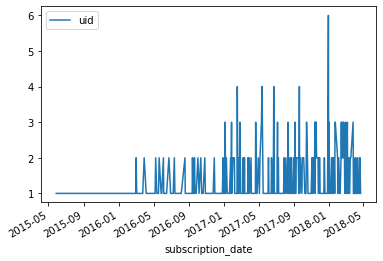

In [203]:
plt.figure(figsize = (16,12))
usa_sub.plot(x = 'subscription_date', y='uid')
plt.show()

In [199]:
# calling rolling on the subs series
usa_rolling_subs = usa_sub['subscription_date'].rolling(
# how many data points to average over
window = 7,
# specify to average backwards
)
usa_rolling_subs

Rolling [window=7,center=False,axis=0,method=single]

In [ ]:
usa_sub['usa_rolling_subs'] = usa_rolling_subs.mean()
usa_sub.tail()

,uid,device,gender,country,age,reg_date,subscription_date,sku,price,month1,sub_day
7,36350096.0,and,M,USA,23,2017-04-07,2017-04-21,sku_seven_1499,499,499.0,14
8,36350096.0,and,M,USA,23,2017-04-07,2017-06-04,sku_three_499,499,NaN,58
9,36350096.0,and,M,USA,23,2017-04-07,2017-07-12,sku_one_199,199,NaN,96
10,36350096.0,and,M,USA,23,2017-04-07,2017-08-01,sku_three_499,499,NaN,116
11,13373345.0,and,M,USA,19,2017-09-08,2017-10-10,sku_one_199,199,NaN,32


In [ ]:
usa_sub['usa_rolling_subs'] = usa_rolling_subs.mean()
usa_sub.tail()

**Noisy data - highest sku purchases by date**

In [217]:
app = pd.read_csv('/QXJ/Python/Datacamp/Marketing/AB/app.csv',
parse_dates = True,
infer_datetime_format = True,
                 index_col = 0)

app = app[app['date']>= '2018-01-01']

app.head()

,date,uid,sku,price
9,2018-01-04,90783242,sku_one_199,199
15,2018-01-04,82460736,sku_four_599,599
16,2018-02-27,82460736,sku_two_299,299
18,2018-03-01,71910153,sku_eight_2099,99
21,2018-03-12,22870987,sku_two_299,299


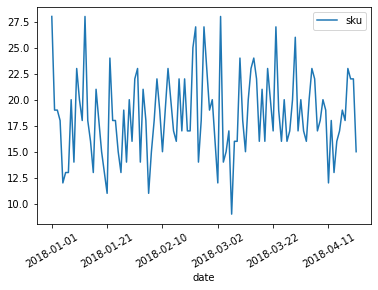

In [219]:
high_sku = app.groupby('date', as_index = False)['sku'].count()
high_sku.plot(x = 'date', y = 'sku')
plt.xticks(rotation = 30)
plt.show()

In [221]:
high_sku.head(2)

,date,sku
0,2018-01-01,28
1,2018-01-02,19


In [220]:
# calculate the exp. avg. over our high sku
# purchase count
exp_mean = high_sku['sku'].ewm(span = 30)
exp_mean

ExponentialMovingWindow [span=30,min_periods=1,adjust=True,ignore_na=False,axis=0,method=single]

In [222]:
# find the weighted mean over this period
high_sku['exp_mean'] = exp_mean.mean()

In [223]:
high_sku.head()

,date,sku,exp_mean
0,2018-01-01,28,28.000000
1,2018-01-02,19,23.350000
2,2018-01-03,19,21.802295
3,2018-01-04,18,20.754624
4,2018-01-05,12,18.762735


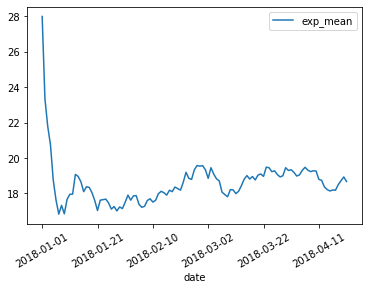

In [234]:
high_sku.plot(x = 'date', y = 'exp_mean')
plt.xticks(rotation = 30)
plt.show()

In [292]:
rev = pd.read_csv('/QXJ/Python/Datacamp/Marketing/AB/revenue.csv',
parse_dates = True,
infer_datetime_format = True, 
                 index_col = 0)
rev.head()

,index,gender,device,revenue,date,country
0,1,male,ios,186557.0,2013-09-20 00:00:00+00:00,USA
1,2,male,ios,177217.0,2013-09-21 00:00:00+00:00,USA
2,3,male,ios,177197.0,2013-09-22 00:00:00+00:00,USA
3,4,male,ios,157193.0,2013-09-23 00:00:00+00:00,USA
4,5,male,ios,165592.0,2013-09-24 00:00:00+00:00,USA


In [293]:
rev['date'] = pd.to_datetime(rev['date'])
rev['date'] = rev['date'].dt.date

In [294]:
rev = rev.groupby('date', as_index = False)['revenue'].sum()
rev.head()

,date,revenue
0,2013-09-20,1040405.0
1,2013-09-21,998827.0
2,2013-09-22,950908.0
3,2013-09-23,890947.0
4,2013-09-24,942562.0


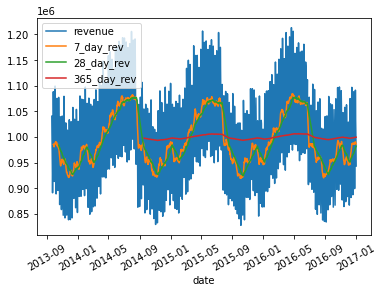

In [295]:
# Compute 7_day_rev
rev['7_day_rev'] = rev.revenue.rolling(window= 7,center=False).mean()

# Compute 28_day_rev
rev['28_day_rev'] = rev.revenue.rolling(window= 28,center=False).mean()
    
# Compute 365_day_rev
rev['365_day_rev'] = rev.revenue.rolling(window= 365,center=False).mean()
    
# Plot date, and revenue, along with the 3 rolling functions (in order)    
rev.plot(x='date', y=['revenue', '7_day_rev', '28_day_rev', '365_day_rev', ])
plt.xticks(rotation = 30)
plt.show()

In [296]:
rev.head()

,date,revenue,7_day_rev,28_day_rev,365_day_rev
0,2013-09-20,1040405.0,NaN,NaN,NaN
1,2013-09-21,998827.0,NaN,NaN,NaN
2,2013-09-22,950908.0,NaN,NaN,NaN
3,2013-09-23,890947.0,NaN,NaN,NaN
4,2013-09-24,942562.0,NaN,NaN,NaN


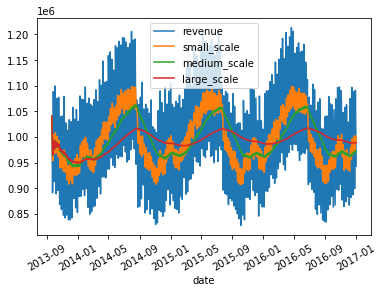

In [299]:
# Calculate 'small_scale'
rev['small_scale'] = rev.revenue.ewm(span = 10).mean()

# Calculate 'medium_scale'
rev['medium_scale'] = rev.revenue.ewm(span = 100).mean()

# Calculate 'large_scale'
rev['large_scale'] = rev.revenue.ewm(span = 500).mean()

# Plot 'date' on the x-axis and, our three averages and 'revenue'
# on the y-axis
rev.plot(x = 'date', y = ['revenue','small_scale', 'medium_scale','large_scale'])
plt.xticks(rotation = 30)
plt.show()

In [301]:
conv_sub = conv_sub.drop(['month1', 'sub_day'],axis = 1)
conv_sub.head(3)

,uid,device,gender,country,age,reg_date,subscription_date,sku,price
0,92513925.0,and,M,BRA,41,2017-05-25,2017-10-20,sku_three_499,499
1,92513925.0,and,M,BRA,41,2017-05-25,2017-05-29,sku_two_299,299
2,92513925.0,and,M,BRA,41,2017-05-25,2017-08-23,sku_four_599,599


**Visualize the drop in conversion rate (6 months)**
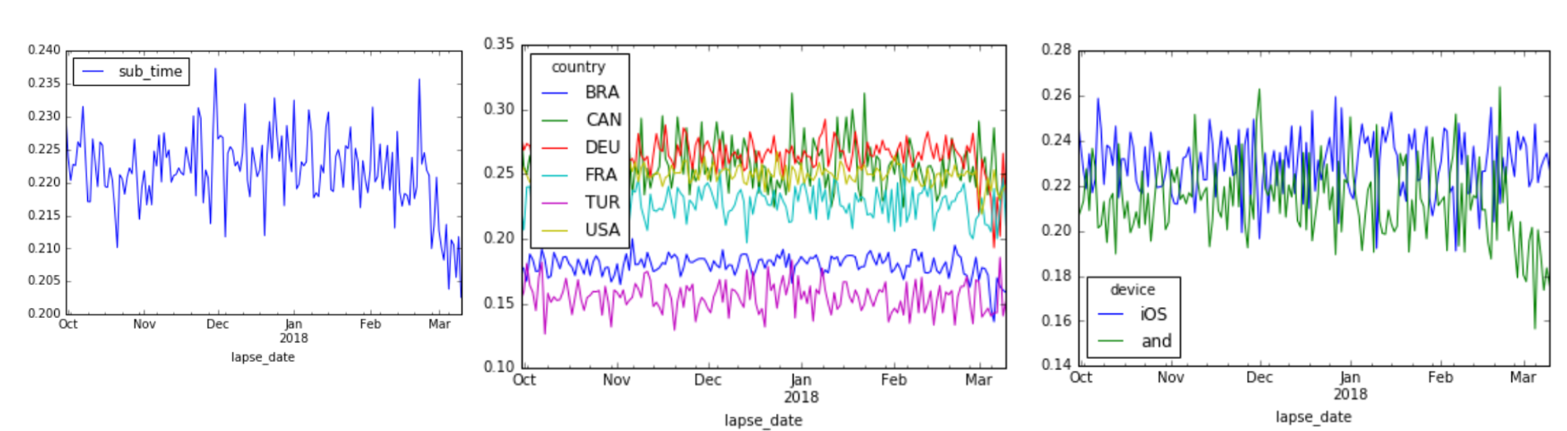
- Is this drop impacting all users or just a specific cohort
- This could provide clues on what the issue may be 
- Ecosystems within our data
  - distinct countries
  - specific device (and or iOS)
- All countries experience the drop
- It is most pronounced in Brazil and Turkey 
  - Our two most and heavy contries
- The drop only appears on and devices
- **event**: holiday and event impacting user behavior 
- **release**: iOS and and software releases
- To truly explore relationships in data we need A/B testing

In [ ]:
# find the data boudries to limit the data
current_date = pd.to_datetime('2018-03-17')

# 6 * 28 to represent the past 6 months
start_date = current _date - timedelta(days = (6*28))

# a mask for our conversion rate data
conv_filter = (
(conversion_data.reg_date >= start_date) & 
(conversion_data.reg_date <= current_date)
)

# filter our conversion rate data
con_data_filt = conversion_data[conv_filter]
conv_data_filt.plot(x = 'reg_date', y = 'sub_time')
plt.show()

**Splitting our data by country and device**

In [ ]:
# after filtering and calculating daily conversion...

# pivot the results to have one column per country
conv_data_cntry = pd.pivot_table(
conv_data_cntry, values = ['sub_time'],
columns = ['country'], index = ['reg_date'],
fill_value = 0)

...

# pivot the results to have one column per device 
conv_data_dev = pd.pivot_table(
conv_data_dev, values = ['sub_time'],
columnss = ['device'], index = ['reg_date'],
fill_value = 0)

**Plotting annotations - events and release**

In [ ]:
# plot the conversion rate trend per device
conv_data_dev.plot(
x = ['reg_date'], y= ['iOS', 'and'])

# iterate through the events and plot each one
events.Date = pd.to_datetime(events.Date)
for row in events.interrwos():
    tmp = row[1]
    # plot vertical line at the x-intercept
    plt.axvline(
    x = tmp.Date, color = 'k', linestyle = '--')
    
# iterate through the releases and plot each one
releases.Date = pd.to_datetime(releases.Date)
for row in releases.interrwos():
    tmp = row[1]
    # plot vertical line at the x-intercept
    if tmp.Event == 'iOS Release':
        plt.axvline(x = tmp.Date, color = 'b', linestyle = '--')
    # plot and realease as red lines
    else: 
        plt.axvline(x = tmp.Date, color = 'r', linestyle = '--')
plt.show()

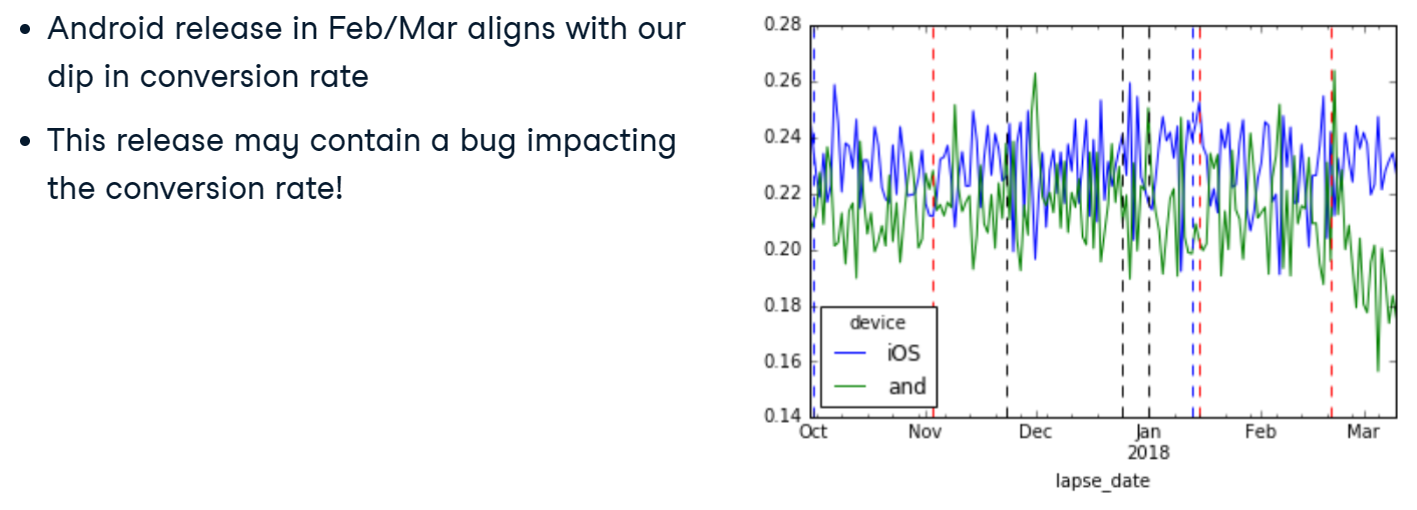

In [302]:
revenue = pd.read_csv('/QXJ/Python/Datacamp/Marketing/AB/revenue.csv',
parse_dates = True,
infer_datetime_format = True, 
                 index_col = 0)
revenue.head()

,index,gender,device,revenue,date,country
0,1,male,ios,186557.0,2013-09-20 00:00:00+00:00,USA
1,2,male,ios,177217.0,2013-09-21 00:00:00+00:00,USA
2,3,male,ios,177197.0,2013-09-22 00:00:00+00:00,USA
3,4,male,ios,157193.0,2013-09-23 00:00:00+00:00,USA
4,5,male,ios,165592.0,2013-09-24 00:00:00+00:00,USA


In [303]:
revenue['date'] = pd.to_datetime(revenue['date'])
revenue['date'] = revenue['date'].dt.date
revenue.head(2)

,index,gender,device,revenue,date,country
0,1,male,ios,186557.0,2013-09-20,USA
1,2,male,ios,177217.0,2013-09-21,USA


In [304]:
rev_pivot = revenue.pivot_table(index = 'date',
                               columns = ['gender', 'device'],
                               values = 'revenue')
rev_pivot.head()

gender       female              male         
device      android      ios  android      ios
date                                          
2013-09-20  10932.6  15014.1  33734.0  44359.8
2013-09-21  10857.5  14601.1  31765.7  42658.4
2013-09-22   9487.0  13244.3  30783.9  41575.6
2013-09-23   9145.6  12446.6  28967.6  38534.9
2013-09-24  10159.5  13592.7  30438.4  40065.6

In [307]:
rev_pivot = rev_pivot[1:(len(rev_pivot) -1 )]

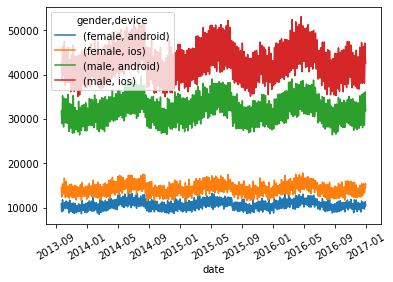

In [308]:
rev_pivot.plot()
plt.xticks(rotation = 30)
plt.show()

## 3. The Design and Application of A/B Testing
- Introduction to A/B testing
  - test two or more variants against each other
  - to evaluate which one performs **best**
  - in the context of a randomized experiment 
- How to design an experiment
  - randomly subset the users and show one set the control and one the treatment
  - monitor the conversion rates of each group to see which is better 
  - response variable 
    - the qty used to measure the impact of your change
    - should either be a KPI or directly related to KPI
    - thte easier to measure the better
  - Factors: the type of variable you are changing
    - The paywall color 
  - Variants: particular changes you are testing 
    - A red versus blue paywall 
  - Experimental unit of our test
    - the smallest unit you are measuring the change over
- Understand the logic behind A/B testing 
- Analyze the results of a test

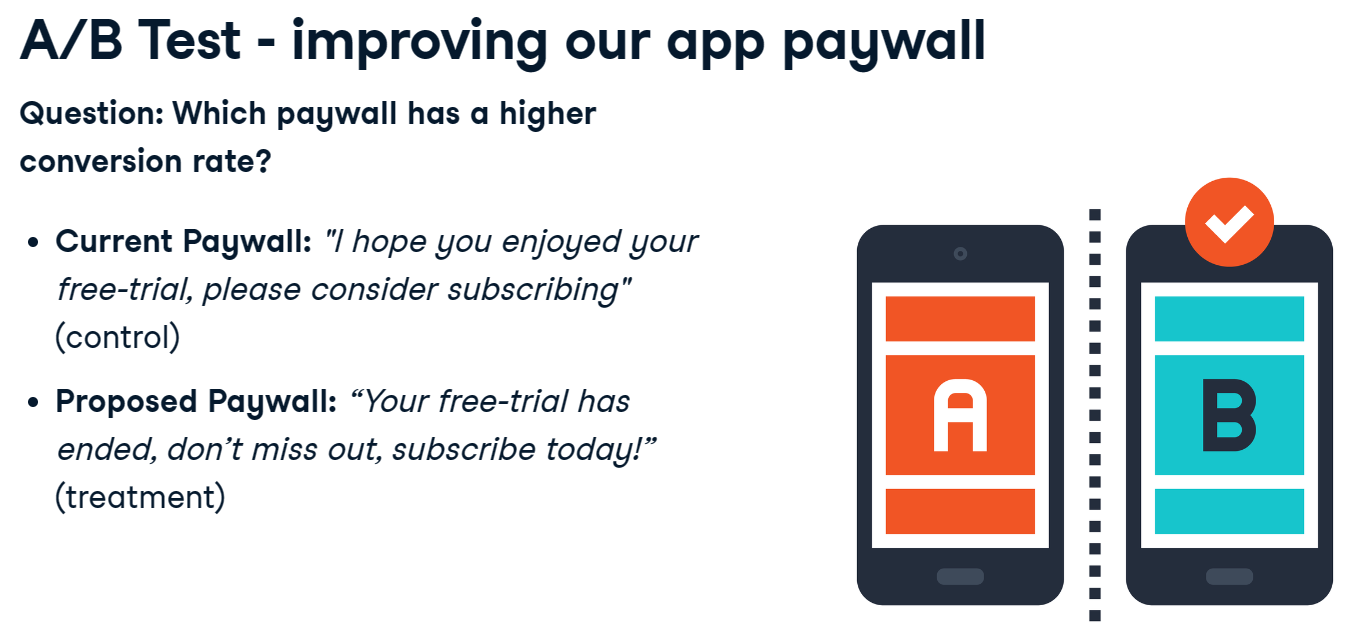

### Increasing our app's revenue with A/B testing
**Specific goals:**
- test change to our consumable purchase paywall to...
- increase revenue by increasing the purchase rate
**General concepts:**
- A/B testing techniques transfer acros avariety of contexts
- keep in mind how you would apply these techniques

In [330]:
cust = pd.read_csv('/QXJ/Python/Datacamp/Marketing/AB/cust.csv',
                       parse_dates = ['reg_date'],
                       index_col = 0)
cust.head(3)

,uid,reg_date,device,gender,country,age
0,54030035.0,2017-06-29 00:00:00+00:00,and,M,USA,19
1,72574201.0,2018-03-05 00:00:00+00:00,iOS,F,TUR,22
2,64187558.0,2016-02-07 00:00:00+00:00,iOS,M,USA,16


In [314]:
paywall = pd.read_csv('/QXJ/Python/Datacamp/Marketing/AB/app.csv',
                       parse_dates = ['date'],
                       index_col = 0)
paywall.head(3)

,date,uid,sku,price
0,2017-07-10,41195147,sku_three_499,499
1,2017-07-15,41195147,sku_three_499,499
2,2017-11-12,41195147,sku_four_599,599


In [349]:
purchase_data = cust.merge(paywall, 
                           how = 'left',
                          on = ['uid'])

purchase_data.fillna(0, inplace = True)
purchase_data.head()

,uid,reg_date,device,gender,country,age,date,sku,price
0,54030035.0,2017-06-29 00:00:00+00:00,and,M,USA,19,0,0,0.0
1,72574201.0,2018-03-05 00:00:00+00:00,iOS,F,TUR,22,0,0,0.0
2,64187558.0,2016-02-07 00:00:00+00:00,iOS,M,USA,16,0,0,0.0
3,92513925.0,2017-05-25 00:00:00+00:00,and,M,BRA,41,2017-10-20 00:00:00,sku_three_499,499.0
4,92513925.0,2017-05-25 00:00:00+00:00,and,M,BRA,41,2017-05-29 00:00:00,sku_two_299,299.0


**Calculating experimental unit**
<br>

- *best to randomize by individuals regardless of experimental unit*
- *good to understand the qualities of your metrics and experimental unit*
- User-purchase
- User -days

*User purchase*

In [356]:
# create a purchase column: 0 - no ,1 yes
purchase_data['purchase'] = np.where(purchase_data['sku'] == 0, 0, 1 )
purchase_data.head()

,uid,reg_date,device,gender,country,age,date,sku,price,purchase
0,54030035.0,2017-06-29 00:00:00+00:00,and,M,USA,19,0,0,0.0,0
1,72574201.0,2018-03-05 00:00:00+00:00,iOS,F,TUR,22,0,0,0.0,0
2,64187558.0,2016-02-07 00:00:00+00:00,iOS,M,USA,16,0,0,0.0,0
3,92513925.0,2017-05-25 00:00:00+00:00,and,M,BRA,41,2017-10-20 00:00:00,sku_three_499,499.0,1
4,92513925.0,2017-05-25 00:00:00+00:00,and,M,BRA,41,2017-05-29 00:00:00,sku_two_299,299.0,1


In [397]:
purchase_data.to_csv('/QXJ/Python/Datacamp/Marketing/AB/purchase_data.csv')

In [358]:
# find the total purchases for each user
total_purchase = purchase_data.groupby('uid',
                                      as_index = False).purchase.sum()
total_purchase.purchase.mean()

0.9006

In [359]:
# find min and max of the purchase record
print(total_purchase.purchase.min())
print(total_purchase.purchase.max())

0
28


*User days: User interactions on a given day*

In [363]:
purchase_data.head(3)

,uid,reg_date,device,gender,country,age,date,sku,price,purchase
0,54030035.0,2017-06-29 00:00:00+00:00,and,M,USA,19,0,0,0.0,0
1,72574201.0,2018-03-05 00:00:00+00:00,iOS,F,TUR,22,0,0,0.0,0
2,64187558.0,2016-02-07 00:00:00+00:00,iOS,M,USA,16,0,0,0.0,0


In [370]:
purchase_data['reg_date'] = purchase_data['reg_date'].dt.date

In [375]:
purchase_data['date'] = np.where(purchase_data['date'] == 0, 
                                 purchase_data['reg_date'],
                                 purchase_data['date'])
purchase_data.head(3)

,uid,reg_date,device,gender,country,age,date,sku,price,purchase
0,54030035.0,2017-06-29,and,M,USA,19,2017-06-29 00:00:00+00:00,0,0.0,0
1,72574201.0,2018-03-05,iOS,F,TUR,22,2018-03-05 00:00:00+00:00,0,0.0,0
2,64187558.0,2016-02-07,iOS,M,USA,16,2016-02-07 00:00:00+00:00,0,0.0,0


In [380]:
purchase_data['date'] = pd.to_datetime(purchase_data['date'], utc=True)
purchase_data['date'] = purchase_data['date'].dt.date

In [384]:
purchase_data.head()

,uid,reg_date,device,gender,country,age,date,sku,price,purchase
0,54030035.0,2017-06-29,and,M,USA,19,2017-06-29,0,0.0,0
1,72574201.0,2018-03-05,iOS,F,TUR,22,2018-03-05,0,0.0,0
2,64187558.0,2016-02-07,iOS,M,USA,16,2016-02-07,0,0.0,0
3,92513925.0,2017-05-25,and,M,BRA,41,2017-10-20,sku_three_499,499.0,1
4,92513925.0,2017-05-25,and,M,BRA,41,2017-05-29,sku_two_299,299.0,1


In [381]:
# group and find the total purchase
total_purchase = purchase_data.groupby(['uid','date'],
                                      as_index = False).purchase.sum()
print(total_purchase.purchase.mean())
print(total_purchase.purchase.min())
print(total_purchase.purchase.max())

0.5100237852531431
0
2


### Prepare to run A/B testing
- Test & control groups: Paywall text
- Questions: 
  - will updating the paywall text impact our revenue
  - how do our three different consumable prices impact this?
- Consideration: 
  - can our test be run well in practice? 
  - will we be able to derive meaningful resutls from it? 
- Test sensitivity: what size of impact is meaningful to detect? 
- Data variability
  - important to understand the variability in your data
  - does the amount spent vary a lot among users? 
    - if it does not then it will be easier to detect a change 
    - **.std()**
    - **contextualize std by calculation**
- Choosing experimental unit & response variable
  - **Primary goal**: increase revenue
  - **Better metric**: paywall view to purchase conversion rate
    - Finding our baseline of conversion rate
  - **Experimental unit**: Paywall views
    - simplest to work with
    - assuming these interactions are independent
    

In [385]:
total_revenue = purchase_data.groupby(['uid'],
                                     as_index = False).price.sum()
total_revenue.price = np.where(
np.isnan(total_revenue.price), 0, total_revenue.price)

avg_revenue = total_revenue.price.mean()
print(avg_revenue)

366.3394


In [387]:
# 1% lift in revenue per user
avg_revenue * 1.01

370.002794

In [388]:
# 10% lift in revenue per user
avg_revenue * 1.1

402.97334000000006

In [389]:
# 20% lift in revenue per user
avg_revenue * 1.2

439.60728

In [390]:
revenue_variation = total_revenue.price.std()
print(revenue_variation)

1176.0354499526902


In [392]:
# contextualize std
revenue_variation / avg_revenue

3.2102346893418785

**Variability of purchases per user**

In [395]:
avg_purchase = total_purchase.purchase.mean()
print('average purchase per user:' ,avg_purchase)

purchase_variation = total_purchase.purchase.std()
print('std of perchase per user.', purchase_variation)

purchase_variation / avg_purchase

average purchase per user: 0.5100237852531431
std of perchase per user. 0.5028505586901855


0.9859355058129352

In [5]:
# base line converstion = total purchase / total paywall views
conversion_rate = (sum(purchase_data.purchase) / 
                   purchase_data.purchase.count())
print(conversion_rate)

# next: calculate variance of conversion rate

0.5092739199276182


In [55]:
purchase_data = pd.read_csv('/QXJ/Python/Datacamp/Marketing/AB/purchase_data.csv',
                           parse_dates = ['reg_date', 'date'],
                           index_col = 0)
purchase_data.head()

,uid,reg_date,device,gender,country,age,date,sku,price,purchase
0,54030035.0,2017-06-29,and,M,USA,19,2017-06-29,0,0.0,0
1,72574201.0,2018-03-05,iOS,F,TUR,22,2018-03-05,0,0.0,0
2,64187558.0,2016-02-07,iOS,M,USA,16,2016-02-07,0,0.0,0
3,92513925.0,2017-05-25,and,M,BRA,41,2017-10-20,sku_three_499,499.0,1
4,92513925.0,2017-05-25,and,M,BRA,41,2017-05-29,sku_two_299,299.0,1


**converstion rate sensitivities**

In [6]:
purchase_data.date = purchase_data.date.dt.floor('d')

# Group and aggregate our combined dataset 
daily_purchase_data = purchase_data.groupby(by=['date'], as_index=False)
daily_purchase_data = daily_purchase_data.agg({'purchase': ['sum', 'count']})

# Find the mean of each field and then multiply by 1000 to scale the result
daily_purchases = daily_purchase_data.purchase['sum'].mean()
daily_paywall_views = daily_purchase_data.purchase['count'].mean()
daily_purchases = daily_purchases * 1000
daily_paywall_views = daily_paywall_views * 1000

print(daily_purchases)
print(daily_paywall_views)

8247.252747252747
16194.139194139194


In [7]:
small_sensitivity = 0.1 

conversion_rate = (sum(purchase_data.purchase) / 
                   purchase_data.purchase.count())
print(conversion_rate)

# Find the conversion rate when increased by the percentage of the sensitivity above
small_conversion_rate = conversion_rate * (1 + small_sensitivity) 

# Apply the new conversion rate to find how many more users per day that translates to
small_purchasers = daily_paywall_views * small_conversion_rate

# Subtract the initial daily_purcahsers number from this new value to see the lift
purchaser_lift = small_purchasers - daily_purchases

print(small_conversion_rate)
print(small_purchasers)
print(purchaser_lift)

0.5092739199276182
0.56020131192038
9071.978021978022
824.7252747252751


In [8]:
medium_sensitivity = 0.2

# Find the conversion rate when increased by the percentage of the sensitivity above
medium_conversion_rate = conversion_rate * (1 + medium_sensitivity) 

# Apply the new conversion rate to find how many more users per day that translates to
medium_purchasers = daily_paywall_views * medium_conversion_rate

# Subtract the initial daily_purcahsers number from this new value to see the lift
purchaser_lift = medium_purchasers - daily_purchases

print(medium_conversion_rate)
print(medium_purchasers)
print(purchaser_lift)

0.6111287039131418
9896.703296703296
1649.4505494505484


In [9]:
large_sensitivity = 0.5

# Find the conversion rate lift with the sensitivity above
large_conversion_rate = conversion_rate * (1 + large_sensitivity)

# Find how many more users per day that translates to
large_purchasers = daily_paywall_views * large_conversion_rate
purchaser_lift = large_purchasers - daily_purchases

print(large_conversion_rate)
print(large_purchasers)
print(purchaser_lift)

0.7639108798914273
12370.87912087912
4123.626373626374


In [10]:
# calculate variance of conversion rate
# Find the number of paywall views 
n = purchase_data.purchase.count()

# Calculate the quantitiy "v"
v = conversion_rate * (1 - conversion_rate) 

# Calculate the variance and standard error of the estimate
var = v / n
se = var**0.5

print(var)
print(se)

1.4132209591109259e-05
0.0037592831219674396


### Sample size
- Null hypothesis: control & treatment have the same impact on the response
  - updated paywall does not improve conversiosn rate 
  - any observed difference is due to randomness
- Rejecting the null hypothesis 
- Statistical power: probability of find a staistically significant result when the null hypothese is false
- Estimate our needed sample size from: 
  - needed level of sensitivity
  - our desired test power and confidence level
  > 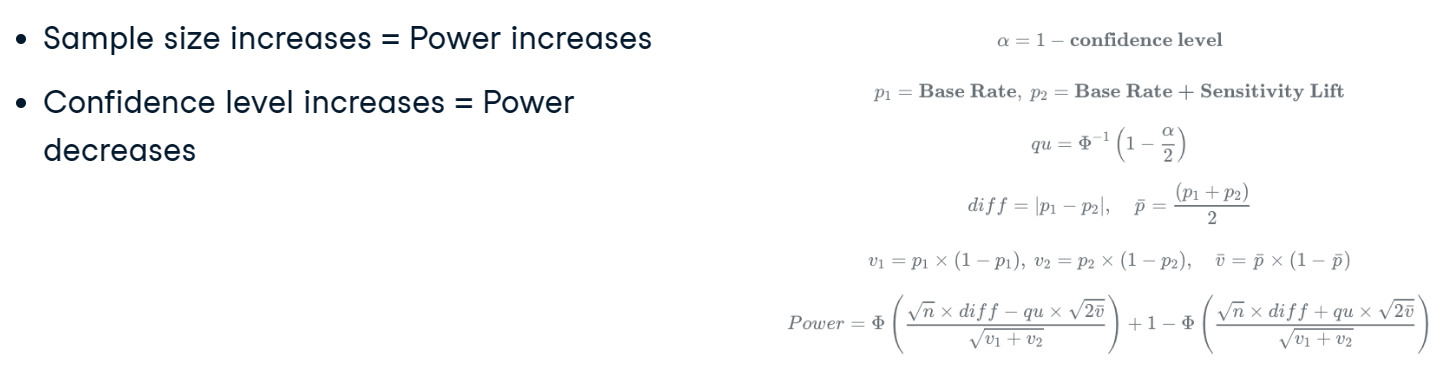
- Decreasing the needed sample sie
  - choose a unit of observation with lower variability
  - excluding users irrelevant to the process/change
  - think through how different factors relate t the sample size 

**Sample size function**

In [93]:
from scipy import stats
def get_power(n, p1, p2, cl):
    alpha = 1 - cl
    qu = stats.norm.ppf(1 - alpha/2)
    diff = abs(p2-p1)
    bp = (p1+p2) / 2
    
    v1 = p1 * (1-p1)
    v2 = p2 * (1-p2)
    bv = bp * (1-bp)
    
    power_part_one = stats.norm.cdf((n**0.5 * diff - qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    power_part_two = 1 - stats.norm.cdf((n**0.5 * diff + qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    
    power = power_part_one + power_part_two
    
    return (power)

In [95]:
def get_sample_size(power, p1, p2, cl, max_n=1000000):
    n = 1 
    while n <= max_n:
        tmp_power = get_power(n, p1, p2, cl)
    if tmp_power >= power: 
        return n 
    else: 
        n = n + 100
    return "Increase Max N Value"

In [11]:
print(conversion_rate)

0.5092739199276182


*calculating our needed sample size*
- **Baseline conversion rate**: 0.5092
- **Confidence levle**: 0.95 (chosen by us)
- **desired power**: 0.80 (chosen by us)
- **sensitivity**: 0.1 (chosen by us)

In [32]:
purchase_data = purchase_data.reset_index()
purchase_data.head(3)

,index,uid,reg_date,device,gender,country,age,date,sku,price,purchase,group
0,0,54030035.0,2017-06-29,and,M,USA,19,2017-06-29,0,0.0,0,T
1,1,72574201.0,2018-03-05,iOS,F,TUR,22,2018-03-05,0,0.0,0,T
2,2,64187558.0,2016-02-07,iOS,M,USA,16,2016-02-07,0,0.0,0,T


In [61]:
data = np.random.randint(1,3,size=17684)
data = pd.DataFrame(data)
data.columns = ['group']
data.head()

,group
0,1
1,2
2,2
3,2
4,2


In [62]:
data['group'] = data['group'].map({
    1 : 'T',
    2 : 'C'
})
data.head(3)

,group
0,T
1,C
2,C


In [66]:
test_result = pd.concat([purchase_data, data], axis = 1)
test_result.head(3)

,uid,reg_date,device,gender,country,age,date,sku,price,purchase,group
0,54030035.0,2017-06-29,and,M,USA,19,2017-06-29,0,0.0,0,T
1,72574201.0,2018-03-05,iOS,F,TUR,22,2018-03-05,0,0.0,0,C
2,64187558.0,2016-02-07,iOS,M,USA,16,2016-02-07,0,0.0,0,C


In [67]:
test_result.to_csv('/QXJ/Python/Datacamp/Marketing/AB/test_result.csv')

In [69]:
test_result_grpd = test_result.groupby(['group'])['uid'].count()
test_result_grpd

group
C    8807
T    8877
Name: uid, dtype: int64

In [71]:
test_result_sub = test_result.groupby(['country','gender','device','group'],
                                      as_index = False)['uid'].count()
test_result_sub.head()

,country,gender,device,group,uid
0,BRA,F,and,C,786
1,BRA,F,and,T,786
2,BRA,F,iOS,C,456
3,BRA,F,iOS,T,521
4,BRA,M,and,C,720


*The above numbers of those groups look no obvious bias among them*

**Test & control group conversion rate**

In [76]:
# find the count of paywall viewer and purchases in each group
test_result_summary = test_result.groupby(['group'],
                                         as_index = False
                                         ).agg({
    'purchase': ['count', 'sum']
})
test_result_summary

group purchase      
           count   sum
0     C     8807  4496
1     T     8877  4510

In [82]:
# calculate our paywall conversion rate by group
test_result_summary['conv_rate'] = test_result_summary['purchase']['sum'] \
/ test_result_summary['purchase']['count']
test_result_summary

group purchase       conv_rate
           count   sum          
0     C     8807  4496  0.510503
1     T     8877  4510  0.508055

**Is the result statistically significant?**
- **Statistical siginificance**: are the conversion rates different enough? 
  - if *yes* then we reject the null hypothese 
  - conclude that the paywall's have different reffects
  - if *no* then it may just be rndomness
- **p-values** : The p-value is the probability of observing a value as or more extreme than the one observed under the Null Hypothesis.
  - probability if the H0 is true...
  - of ovserving a value as or more extreme...
  - than the one we observed 
  - **Low p-values**
    - represent potentially significnat results
    - the observation is unlikely to have happend due to randomness
  > 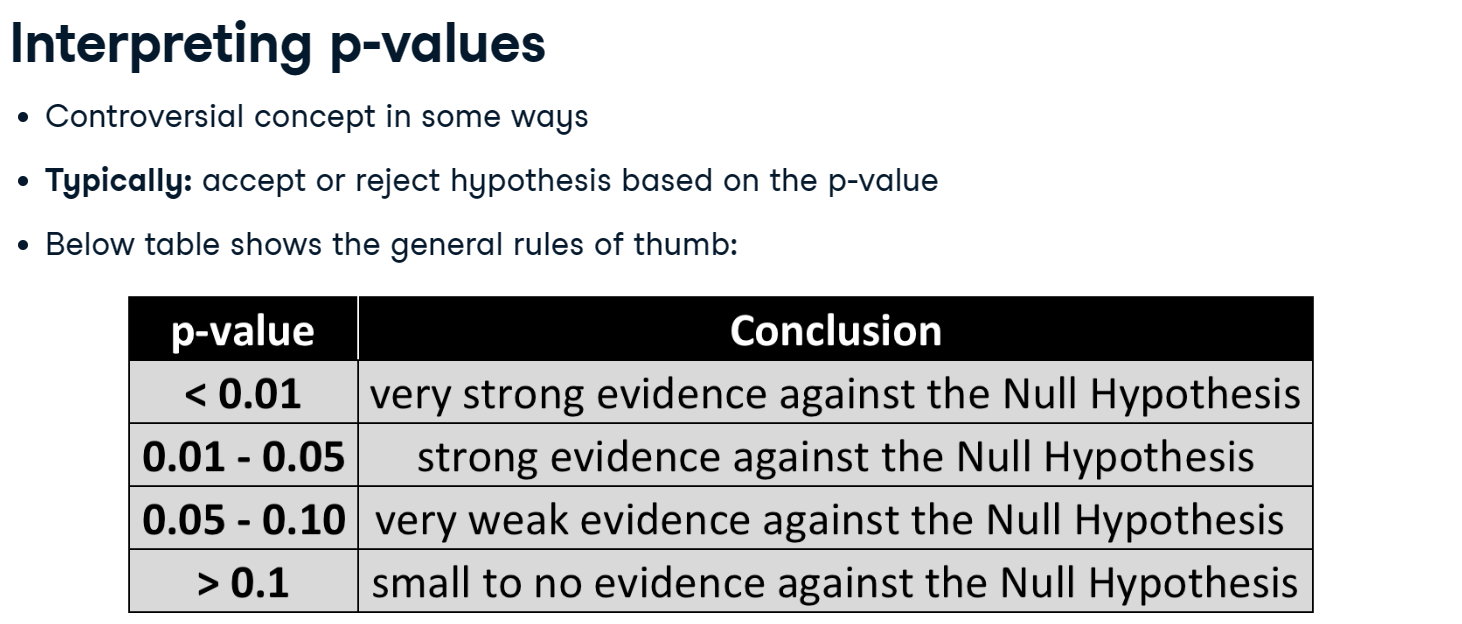
- Understanding statistical significance
  > 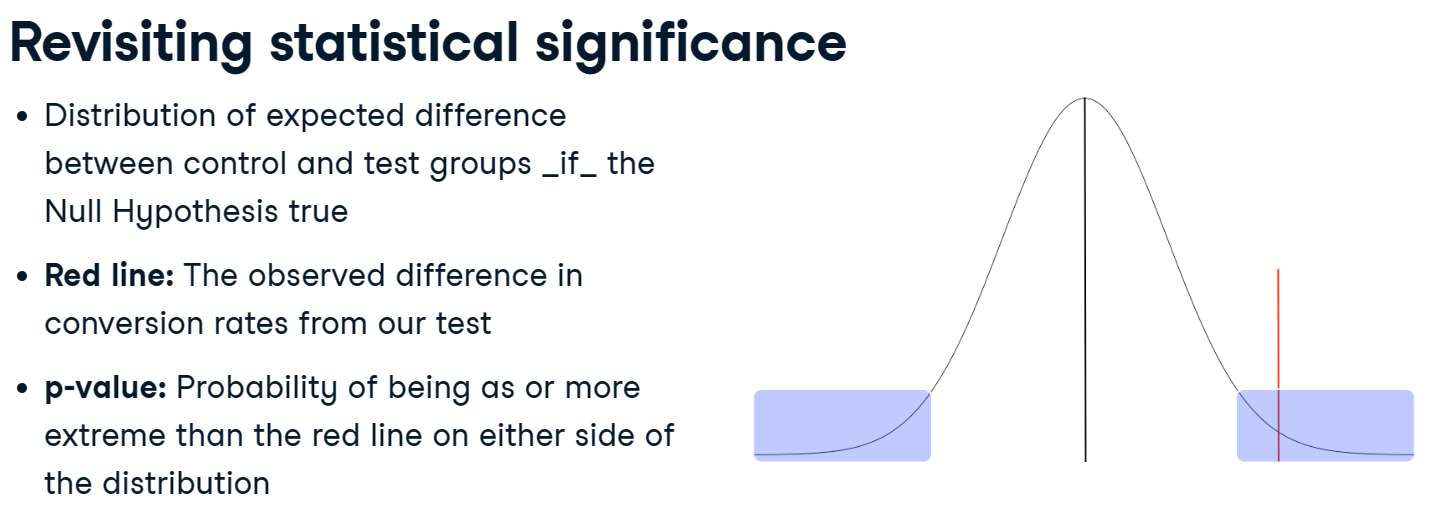
- Statistical significant 
- Confidence interval
  > 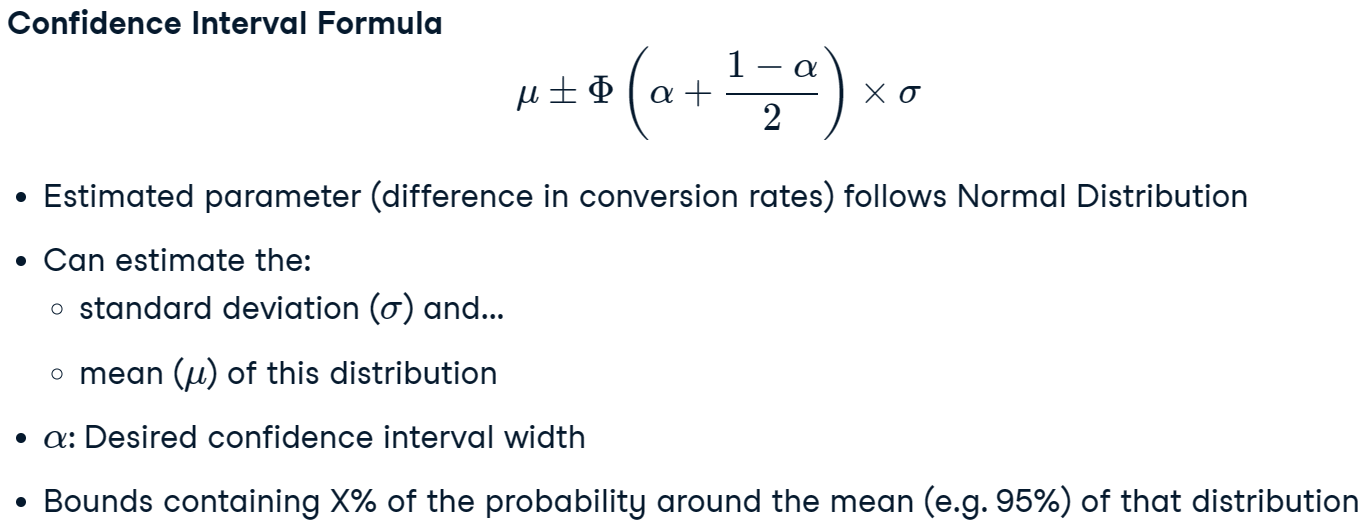

In [83]:
# Compute and print the results
results = test_result.groupby('group').agg({'uid':pd.Series.nunique}) 
print(results)

        uid
group      
C      5502
T      5580


In [84]:
# Find the unique users in each group 
results = test_result.groupby('group').agg({'uid': pd.Series.nunique}) 

# Find the overall number of unique users using "len" and "unique"
unique_users = len(test_result.uid.unique()) 

# Find the percentage in each group
results = results / unique_users * 100
print(results)

         uid
group       
C      55.02
T      55.80


In [85]:
# Find the unique users in each group, by device and gender
results = test_result.groupby(by=['group','device', 'gender']).agg({'uid': pd.Series.nunique}) 

# Find the overall number of unique users using "len" and "unique"
unique_users = len(test_result.uid.unique())

# Find the percentage in each group
results = results / unique_users * 100
print(results)

                       uid
group device gender       
C     and    F       16.71
             M       15.22
      iOS    F       11.90
             M       11.19
T     and    F       17.18
             M       15.40
      iOS    F       11.99
             M       11.23


**Understanding statistical significance**

In [90]:
from scipy import stats
# calculate the p-value from group conv_rate and group sizes
def get_pvalue(con_conv, test_conv, con_size, test_size):
    lift = -abs(test_conv - con_conv)
    scale_one = con_conv * (1 - con_conv) * (1 / con_size)
    scale_two = test_conv * (1 - test_conv ) * (1 / test_size)
    scale_val = (scale_one + scale_two) ** 0.5
    p_value = 2 * stats.norm.cdf(lift, loc = 0, scale = scale_val)
    
    return p_value

In [91]:
# previously calculated quantities
con_conv = 0.5105  # control group conv_rate
test_conv = 0.5080 # test group conv_rate
con_size = 5502
test_size = 5580

# calculate the test p-value 
p_value = get_pvalue(con_conv, test_conv, con_size, test_size)
print(p_value)

0.7923832260959676


*The P-value is > 0.05, cannot reject Null hypothesis.*
<br>

**To interpret the result**
- calculate the power of the result
- confidence interval 
  - range of values for our estimation rather than single number
  - provides context for our estimation process
  - series of repeated experiments...
    - the calculated intervals will contain the true parameter X% of the time
   - the true conversion is a fixed quantity, our estimation and intervals are variable
   > 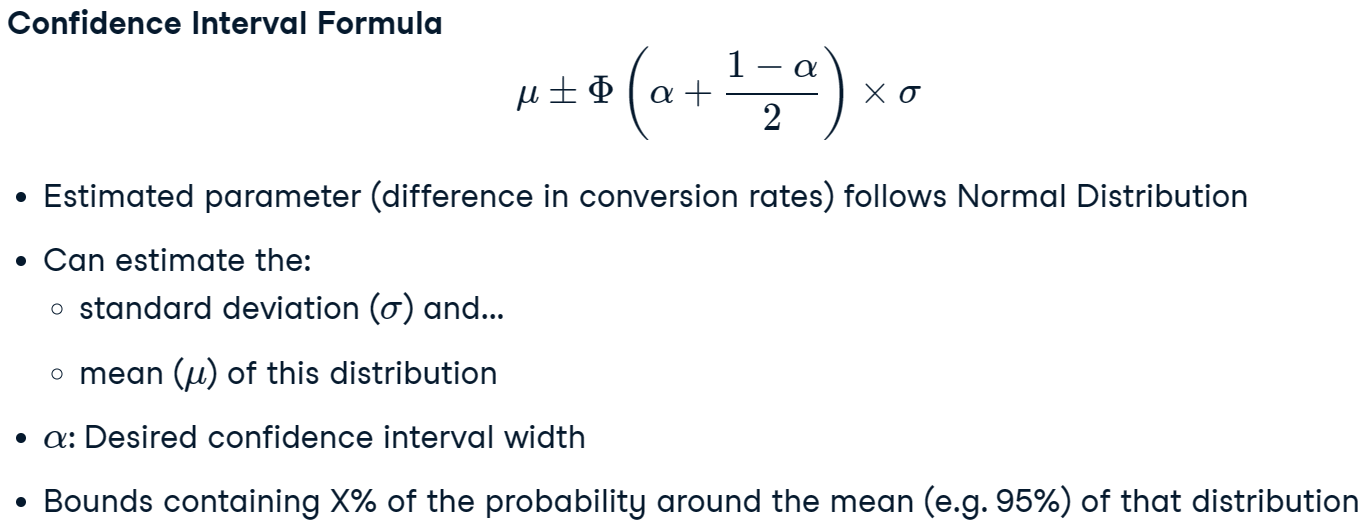
- Interpret the result
  > 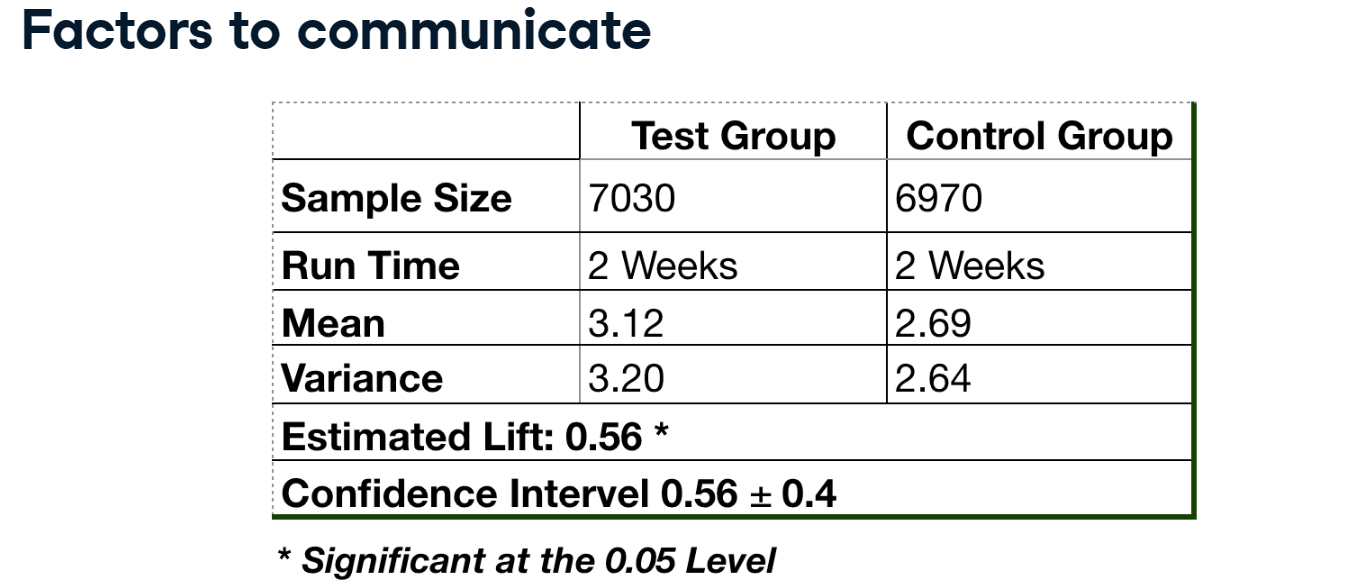

In [94]:
# calculate our test's power
get_power(test_size, con_conv, test_conv, 0.95)

# very low power 

0.058030053551049

**confidence interval function**

In [100]:
from scipy import stats
def get_ci(test_conv, con_conv, test_size, con_size, ci):
    
    sd = ((test_conv * (1 - test_conv))/test_size +
         (con_conv * (1 - con_conv))/con_size) ** 0.5
    lift = test_conv - con_conv
    
    val = stats.norm.isf((1-ci)/2) 
    lwr_bnd = lift - val * sd
    upr_bnd = lift + val * sd
    
    return(lwr_bnd, upr_bnd)

In [101]:
# previously calculated quantities
con_conv = 0.5105  # control group conv_rate
test_conv = 0.5080 # test group conv_rate
con_size = 5502
test_size = 5580

get_ci(
test_conv, con_conv,
test_size, con_size,
0.95)

(-0.021115467413785456, 0.016115467413785563)

In [104]:
def get_ci(value, cl, sd):
  loc = stats.norm.ppf(1 - cl/2)
  rng_val = stats.norm.cdf(loc - value/sd)

  lwr_bnd = value - rng_val
  upr_bnd = value + rng_val 

  return_val = (lwr_bnd, upr_bnd)
  return(return_val)

In [106]:
# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.975, 0.5)
print(confidence_interval)

# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.95, 2)
print(confidence_interval)

# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.95, 0.001)
print(confidence_interval)

(0.9755040421682947, 1.0244959578317054)
(0.6690506448818785, 1.3309493551181215)
(1.0, 1.0)


In [109]:
# Calculate the mean of our lift distribution 
lift_mean = test_conv - con_conv

# Calculate variance and standard deviation 
lift_variance = (1 - test_conv) * test_conv /test_size + (1 - con_conv) * con_conv / con_size
lift_sd = lift_variance**0.5

# Find the confidence intervals with cl = 0.95
confidence_interval = get_ci(lift_mean, 0.95, lift_sd)
print(confidence_interval)

(-0.6302590378258672, 0.6252590378258673)


### Visualizing the results
- **Histogram**: bucketed counts of observations across values
  - Histogram of centerred and scaled conversion rates for uers
    - **(conv_rate - mean) / sd**
  - plot the bucketed counts of observations across values
- plot the probabilities across the distribution of converstion rates
- plot the difference of conversion rate 
- plot the confidence value and fill in between

In [116]:
test_result_summary

group purchase       conv_rate
           count   sum          
0     C     8807  4496  0.510503
1     T     8877  4510  0.508055

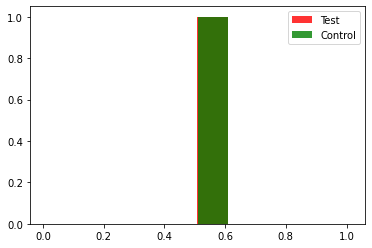

In [118]:
# general a histogram
var = test_result_summary[test_result_summary.group == 'T']
con = test_result_summary[test_result_summary.group == 'C']

# plot conv_rate for each group
plt.hist(var['conv_rate'], color = 'red',
        alpha = 0.8, label = 'Test')
plt.hist(con['conv_rate'], color = 'green',
        alpha = 0.8, label = 'Control')
plt.legend(loc = 'upper right')
plt.show()

In [119]:
# plotting a disribution
mean_con = 0.090965
mean_test = 0.102005
var_con = (mean_con * (1 - mean_con)) / 8807
var_test = (mean_test * (1 - mean_test)) / 8877

# generate a range of values across the distribution from +/- 3 sd arund the mean
con_line = np.linspace(-3 * var_con ** 0.5 +
                      mean_con, 3 * var_con ** 0.5 + mean_con, 100)
test_line = np.linspace(-3 * var_test ** 0.5 +
                      mean_test, 3 * var_con ** 0.5 + mean_test, 100)

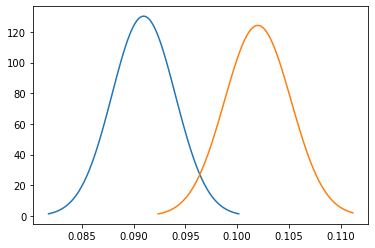

In [121]:
# norm.pdf(): converts values to probabilities form normal distribution
from scipy.stats import norm

# plot the probabilities across the distribution of converstion rates 
plt.plot(con_line, norm.pdf(
con_line, mean_con, var_con ** 0.5))

plt.plot(test_line, norm.pdf(
test_line, mean_test, var_test ** 0.5))

plt.show()

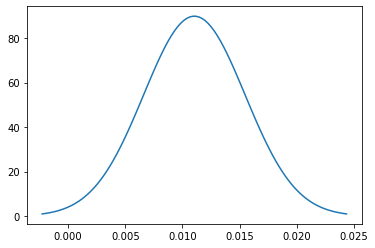

In [124]:
lift = mean_test - mean_con
var = var_test + var_con

# plot our difference in conv_rate as a distribution
diff_line = np.linspace( -3 * var ** 0.5 + lift, 
                        3 * var ** 0.5 + lift, 100)

plt.plot(diff_line, norm.pdf(
diff_line, lift, var**0.5))

plt.show()

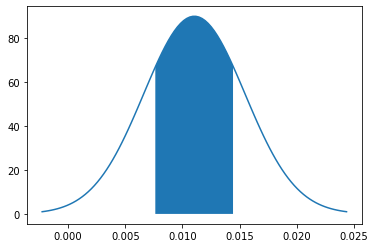

In [127]:
# plotting the confidence interval 

# find values over our confidence interval
section = np.arange(0.007624, 0.01445, 1/10000)

# fill in between those boundaries
# .fill_beween: fill in interval
plt.fill_between(section, norm.pdf(section, lift, var**0.5))

# plot the difference with the confidence int.
plt.plot(
diff_line, norm.pdf(diff_line, lift, var**0.5))

plt.show()